# Projeto 2 Ciência de Dados:

Nome: Arthur Motta Gomes

Nome: Enzo Dadier Lacks Zamberlan

Nome: Guilherme Fugita

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm, probplot
from sklearn.utils import shuffle

In [2]:
filename = 'all_games.csv'

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Enzo Z\Backup Lenovo\CIÊNCIA_DE_DADOS\Projeto_2\Projeto_2_CDADOS


In [4]:
dataset = pd.read_csv(filename)
dataset.head(5)

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


# Verificando o tamanho do DATASET:

Aqui verificaremos o tamanho do dataset, ainda sem descontar suas linhas que possuem valores nulos e sem valores.

In [5]:
dataset.shape

(18800, 6)

# Para verificar valores nulos:

Utilizaremos o .insull() para verificar se há valores nulos no nosso dataset, sendo assim faremos a somas desses valores nulos pelo código .sum(). Com isso nós iremos transformar os valores nulos em "NaN", ou seja, *"Not a Number"*, para logo em seguida eliminá-los criando enfim um dataset limpo e sem valores nulos.

In [6]:
dataset.isnull().sum()

name              0
platform          0
release_date      0
summary         114
meta_score        0
user_review       0
dtype: int64

In [7]:
nan_value = float("NaN")
data_clean = dataset
data_clean.replace("", nan_value, inplace=True)
# data_clean.summary = data_clean.summary.fillna('SEM RESUMO', inplace=True)
data_clean.summary = data_clean.summary.replace(np.nan, 'SEM RESUMO', regex=True)

# data_clean.dropna(inplace=True)

In [8]:
data_clean.isnull().sum()

name            0
platform        0
release_date    0
summary         0
meta_score      0
user_review     0
dtype: int64

In [9]:
data_clean.shape

(18800, 6)

# Identificando a categoria de cada elemento utilizado e transformando-os caso necessário:

In [10]:
data_clean.dtypes

name            object
platform        object
release_date    object
summary         object
meta_score       int64
user_review     object
dtype: object

In [11]:
data_clean.user_review = pd.to_numeric(data_clean.user_review, errors='coerce').fillna(0).astype(np.float)

C:\Users\ENZOZ~1\AppData\Local\Temp/ipykernel_10756/3681419303.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_clean.user_review = pd.to_numeric(data_clean.user_review, errors='coerce').fillna(0).astype(np.float)


In [12]:
data_clean.dtypes

name             object
platform         object
release_date     object
summary          object
meta_score        int64
user_review     float64
dtype: object

# A partir desse momento iniciaremos nossa análise exploratória do problema apresentado pelo grupo:

Tendo em vista o anseio por saber qual será a plataforma de publicação do próximo jogo de sucesso e sua respectiva nota atribuída, vamos à seguinte exploração de dados:

In [13]:
dados_meta_score = data_clean.drop(['name','platform','release_date','summary','user_review'], axis=1)
dados_meta_score.describe().round(3)

,meta_score
count,18800.000
mean,70.649
std,12.225
min,20.000
25%,64.000
50%,72.000
75%,80.000
max,99.000


In [14]:
dados_user_review = data_clean.drop(['name','platform','release_date','summary','meta_score'], axis=1)
dados_user_review.describe().round(3)

,user_review
count,18800.000
mean,6.483
std,2.233
min,0.000
25%,6.000
50%,7.200
75%,7.900
max,9.700


_Observe que aqui teremos todos os consoles e videogames envolvidos no nosso pdSeries_

In [15]:
data_clean.drop(['name','release_date','summary','user_review','meta_score'], axis=1).groupby(data_clean.platform).describe().round(3)

platform                                
                     count unique                top  freq
platform                                                  
 3DS                   396      1                3DS   396
 DS                    720      1                 DS   720
 Dreamcast             125      1          Dreamcast   125
 Game Boy Advance      438      1   Game Boy Advance   438
 GameCube              448      1           GameCube   448
 Nintendo 64            71      1        Nintendo 64    71
 PC                   4864      1                 PC  4864
 PSP                   512      1                PSP   512
 PlayStation           187      1        PlayStation   187
 PlayStation 2        1414      1      PlayStation 2  1414
 PlayStation 3        1256      1      PlayStation 3  1256
 PlayStation 4        2056      1      PlayStation 4  2056
 PlayStation 5         124      1      PlayStation 5   124
 PlayStation Vita      257      1   PlayStation Vita   257
 Stadia                  5      1             Stadia     5
 Switch               1399      1             Switch  1399
 Wii                   655      1                Wii   655
 Wii U                 184      1              Wii U   184
 Xbox                  789      1               Xbox   789
 Xbox 360             1644      1           Xbox 360  1644
 Xbox One             1179      1           Xbox One  1179
 Xbox Series X          77      1      Xbox Series X    77

# Para facilitar a compreensão do projeto vamos juntar os respectivos equipamentos com suas empresas de origem!

Para isso adicionamos os respectvios aparelhos à sua empresa de origem. Vale notar aqui que todos os nomes no pdSeries possuem um espaço antes de começarem (e que o Game Boy Advance possui uma quebra de parágrafo), fato que foi adicionado aos respectivos nomes também.

In [16]:
data_clean.platform[0] == ' Nintendo 64' # Valida a entrada dos nomes 

True

In [17]:
data_clean.platform[53] == ' Game Boy Advance' # Valida a entrada dos nomes 

True

In [18]:
# filtro_nintendo = (data_clean['platform']=='3DS')| (data_clean['platform']=='DS') | (data_clean['platform']==
#                                 'Game Boy Advence') | (data_clean['platform']== 'GameCube') | (data_clean['platform']== 
#                                 'Nintendo 64') | (data_clean['platform']== 'Switch') | (data_clean['platform']== 
#                                                                                         'Wii') | (data_clean['platform']== 
#                                                                                                   'Wii U')
# data_clean.loc[filtro_nintendo, 'Empresa'] = 'Nintendo'
# data_clean

In [19]:
empresa = []
lista_nintendo = [' 3DS',' DS',' Dreamcast',' Game Boy Advance',' GameCube',' Nintendo 64',' Switch',' Wii',' Wii U']
lista_playstation = [' PSP', ' PlayStation',' PlayStation 2',' PlayStation 3',' PlayStation 4',' PlayStation 5',' PlayStation Vita' ]
lista_pc = [' PC',' Stadia']
lista_xbox = [' Xbox', ' Xbox 360', ' Xbox One', ' Xbox Series X']
for s in data_clean.platform:
    if s in lista_nintendo:
        empresa.append('Nintendo')
    if s in lista_playstation:
        empresa.append('PlayStation')
    if s in lista_pc:
        empresa.append('PC')
    if s in lista_xbox:
        empresa.append('Xbox')
#     if s not in lista_nintendo and s not in lista_playstation and s not in lista_pc and s not in lista_xbox: 
#         empresa.append('oq?')
    
        
data_clean['empresa'] = empresa

data_clean

,name,platform,release_date,summary,meta_score,user_review,empresa
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,Nintendo
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,PlayStation
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,PlayStation
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4,Nintendo
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,Xbox
...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3,Xbox
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7,Xbox
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9,PlayStation
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7,PC


In [20]:
data_clean.drop(['name','release_date','summary','user_review','meta_score','platform'], axis=1).groupby(data_clean.empresa).describe().round(3)

empresa                          
              count unique          top  freq
empresa                                      
Nintendo       4436      1     Nintendo  4436
PC             4869      1           PC  4869
PlayStation    5806      1  PlayStation  5806
Xbox           3689      1         Xbox  3689

# Criando um modelo primário (teste) que prevê a nota dada por um certo meta score, a partir das avaliações feitas pelos usuários:

In [21]:
x_dados = data_clean['user_review']*10 # Definindo user_review como explicativa e multiplicando por 10 para equiparar as casas
# decimais.
y_dados = data_clean['meta_score']  # Definindo meta_score como resposta

# Matriz de 1s e valores de x_dados
X_dados = sm.add_constant(x_dados) # Adiciona coluna de 1s para estimar intercepto junto com a coluna de x (dados)

C:\Users\Enzo Z\.conda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
# Define o modelo
model = sm.OLS(y_dados, X_dados)    

# Faz o ajuste
results = model.fit()   

# Mostra os resultados
results.summary()       

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             meta_score   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     4166.
Date:                Thu, 25 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:12:18   Log-Likelihood:                -71859.
No. Observations:               18800   AIC:                         1.437e+05
Df Residuals:                   18798   BIC:                         1.437e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.5293      0.248    224.130      0.000      55.044      56.015
user_review     0.2332      0.004     64.543      0.000       0.226       0.240
==============================================================================
Omnibus:                     1285.840   Durbin-Watson:                   0.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1581.545
Skew:                          -0.666   Prob(JB):                         0.00
Kurtosis:                       3.495   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**AGORA USE A SAIDA do OLS Regression Results**

Como resultado do `statsmodels.OLS` obtivemos a tabela acima, com informações de $\hat\beta_0$ (intercepto: `const`) e $\hat\beta_1$ (inclinação da reta: `2010_income`). Esses valores podem ser encontrados na coluna `coef` do *output* do OLS Regression Results.

In [23]:
beta0 = results.params['const']
beta1 = results.params['user_review']

print("Estimativa de beta0 (coeficente linear): {0}".format(beta0))
print("Estimativa de beta1 (coeficente angular): {0}".format(beta1))

Estimativa de beta0 (coeficente linear): 55.52933069970175
Estimativa de beta1 (coeficente angular): 0.2332088854330443


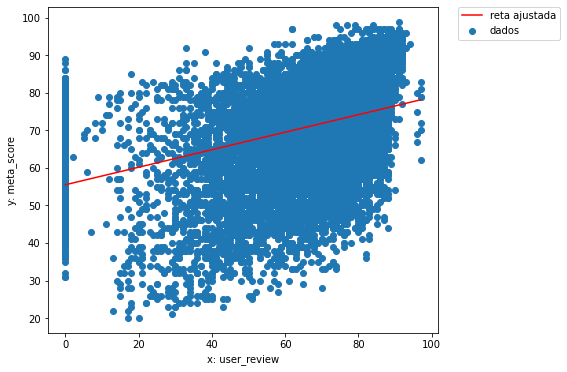

In [24]:
x_vec = np.linspace(x_dados.min(), x_dados.max(), 100000)
y_vec = beta0 + beta1*x_vec

plt.figure(figsize=(7,6))
plt.plot(x_vec,y_vec, color="r") # resultados da regressão
plt.scatter(x_dados, y_dados); # dados
plt.xlabel("x: user_review")
plt.ylabel("y: meta_score")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

# Agora vamos criar um novo modelo, adicionando os anos de lançamento como parâmetro de comparação entre os jogos lançados:

Primeiro vamos identificar o ano obtido em `release_date`:

In [27]:
data_clean.release_date[834].split(',')[1].strip() # Valida se a data é retirada

'2017'

Vamos identificar o tamanho dessa coluna:

In [28]:
range(len(data_clean.release_date))

range(0, 18800)

Agora adicionaremo seus respectivos anos a uma lista, para posteriormente adicioná-la ao `DataFrame`:

In [29]:
anos = []

for s in range(len(data_clean.release_date)):
    anos.append (data_clean.release_date[s].split(',')[1].strip())
        

In [30]:
data_clean.head(834)

,name,platform,release_date,summary,meta_score,user_review,empresa
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,Nintendo
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,PlayStation
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,PlayStation
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4,Nintendo
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,Xbox
...,...,...,...,...,...,...,...
829,XCOM 2,PC,"February 5, 2016",20 years have passed since world leaders uncon...,88,7.3,PC
830,Dishonored 2,PlayStation 4,"November 10, 2016","Dishonored 2 takes your protagonist, Corvo Att...",88,8.0,PlayStation
831,Tony Hawk's Pro Skater 1 + 2,Xbox One,"September 4, 2020",Drop back in with the most iconic skateboardin...,88,7.9,Xbox
832,What Remains of Edith Finch,Switch,"July 4, 2019",What Remains of Edith Finch is a collection of...,88,7.8,Nintendo


In [31]:
data_clean

,name,platform,release_date,summary,meta_score,user_review,empresa
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,Nintendo
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,PlayStation
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,PlayStation
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4,Nintendo
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,Xbox
...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3,Xbox
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7,Xbox
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9,PlayStation
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7,PC


In [32]:
data_clean['ano'] = anos
data_clean

,name,platform,release_date,summary,meta_score,user_review,empresa,ano
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,Nintendo,1998
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,PlayStation,2000
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,PlayStation,2008
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4,Nintendo,1999
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,Xbox,2008
...,...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3,Xbox,2013
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7,Xbox,2003
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9,PlayStation,2015
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7,PC,2012


Vamos verificar o tipo de categoria dada ao `ano` e caso necessário vamos mudá-la:

In [33]:
data_clean.dtypes

name             object
platform         object
release_date     object
summary          object
meta_score        int64
user_review     float64
empresa          object
ano              object
dtype: object

In [34]:
data_clean.ano = pd.to_numeric(data_clean.ano, errors='coerce').fillna(0).astype(np.int64)

In [35]:
data_clean.dtypes

name             object
platform         object
release_date     object
summary          object
meta_score        int64
user_review     float64
empresa          object
ano               int64
dtype: object

In [36]:
data_clean

,name,platform,release_date,summary,meta_score,user_review,empresa,ano
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,Nintendo,1998
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,PlayStation,2000
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,PlayStation,2008
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4,Nintendo,1999
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,Xbox,2008
...,...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3,Xbox,2013
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7,Xbox,2003
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9,PlayStation,2015
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7,PC,2012


#  Para podermos fazer uma análise exploratória mais profunda e completa, projetaremos gráficos em função dos anos para as notas dadas aos jogos!

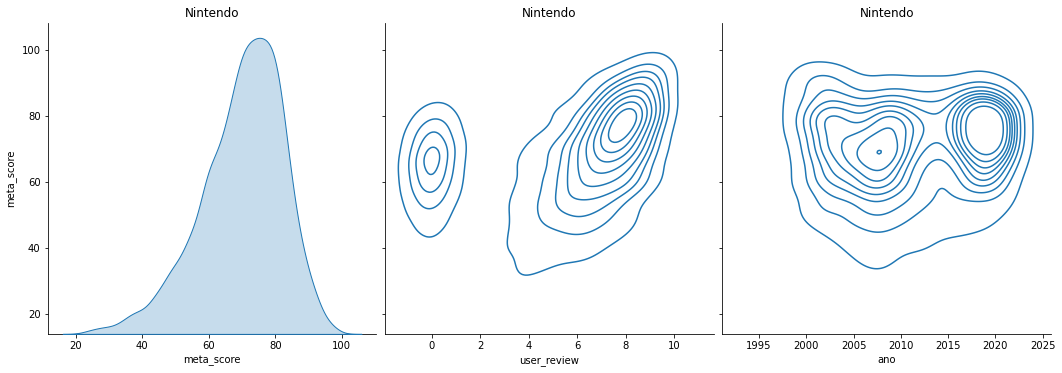

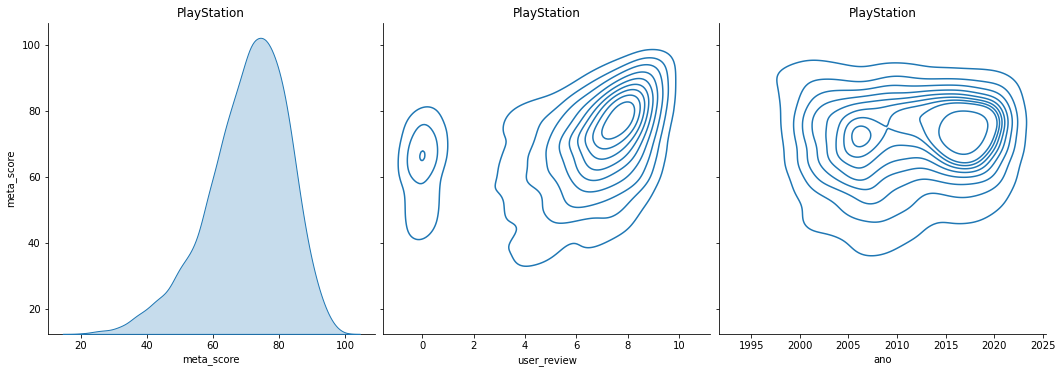

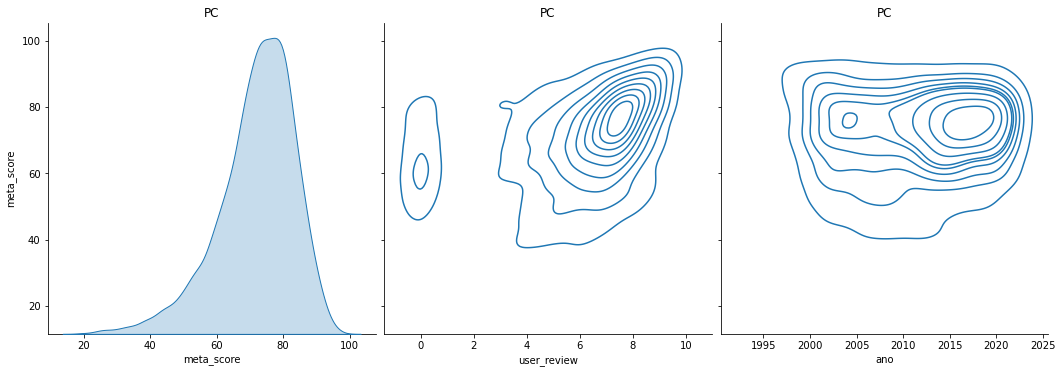

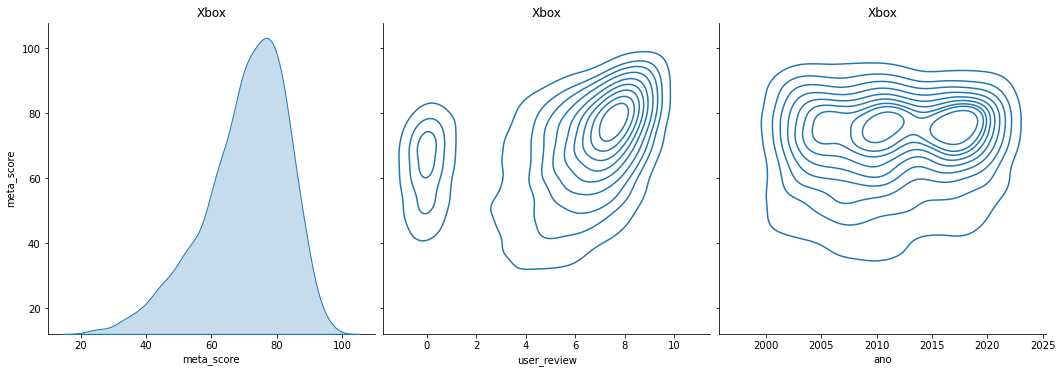

In [37]:
# plt.subplot(411)
sns.pairplot(data=data_clean[data_clean.empresa=='Nintendo'],
                  x_vars=['meta_score','user_review', 'ano' ],
                  y_vars=['meta_score'] , height=5 , kind="kde").set(title='Nintendo')

# plt.subplot(412)
# plt.title("PlayStation")
sns.pairplot(data=data_clean[data_clean.empresa=='PlayStation'],
                  x_vars=['meta_score','user_review', 'ano' ],
                  y_vars=['meta_score'] , height=5 , kind="kde").set(title='PlayStation')

# plt.subplot(413)
# plt.title("PC")
sns.pairplot(data=data_clean[data_clean.empresa=='PC'],
                  x_vars=['meta_score','user_review', 'ano' ],
                  y_vars=['meta_score'] , height=5 , kind="kde").set(title='PC')

# plt.subplot(414)
# plt.title("Xbox")
sns.pairplot(data=data_clean[data_clean.empresa=='Xbox'],
                  x_vars=['meta_score','user_review', 'ano' ],
                  y_vars=['meta_score'] , height=5 , kind="kde").set(title='Xbox')



# Tendo em vista o nosso objetivo de previsão, agora, vamos embaralhar o dataset a fim de possuir valores de teste e valores de comparção para uso futuro!

`Vamos embaralhar o dataset para dividi-lo em duas frentes`:

In [38]:
dataset_embaralhado = shuffle(data_clean)
dataset_embaralhado.head(5)

,name,platform,release_date,summary,meta_score,user_review,empresa,ano
1312,Steel Beasts,PC,"September 24, 2000",More than just another modern tank simulation....,86,7.7,PC,2000
5091,Call of Duty: Black Ops - Escalation,Xbox 360,"May 3, 2011",5 all-new maps; featuring 4 Multiplayer maps a...,79,5.3,Xbox,2011
12281,Genital Jousting,PC,"January 18, 2018",Genital Jousting is an online and local multip...,68,8.4,PC,2018
12179,The Blind Prophet,PC,"February 5, 2020",A point'n'Click adventure game. Resolve myster...,68,7.5,PC,2020
8988,BloodRayne,GameCube,"October 15, 2002",BloodRayne is a killing machine. The Brimstone...,73,8.2,Nintendo,2002


`Dividindo o dataset em duas partes, uma de teste e uma de validação`:

In [46]:
dataset_treino = dataset_embaralhado.iloc[:15040,:] #treino
dataset_teste = dataset_embaralhado.iloc[15041:,:] #teste
print("Shape of new dataframes - {} , {}".format(dataset_treino.shape, dataset_teste.shape))

Shape of new dataframes - (15040, 8) , (3759, 8)


# Para uma análise com mais variáveis consideradas, vamos à uma regressão múltipla!

In [41]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [42]:
data_clean_dummies = pd.get_dummies(dataset_treino, columns=['empresa'])

In [57]:
data_clean_dummies.head(20)

,name,platform,release_date,summary,meta_score,user_review,ano,empresa_Nintendo,empresa_PC,empresa_PlayStation,empresa_Xbox
1312,Steel Beasts,PC,"September 24, 2000",More than just another modern tank simulation....,86,7.7,2000,0,1,0,0
5091,Call of Duty: Black Ops - Escalation,Xbox 360,"May 3, 2011",5 all-new maps; featuring 4 Multiplayer maps a...,79,5.3,2011,0,0,0,1
12281,Genital Jousting,PC,"January 18, 2018",Genital Jousting is an online and local multip...,68,8.4,2018,0,1,0,0
12179,The Blind Prophet,PC,"February 5, 2020",A point'n'Click adventure game. Resolve myster...,68,7.5,2020,0,1,0,0
8988,BloodRayne,GameCube,"October 15, 2002",BloodRayne is a killing machine. The Brimstone...,73,8.2,2002,1,0,0,0
14292,The Legend of Heroes II: Prophecy of the Moonl...,PSP,"June 20, 2006",This role-playing title featuring meticulously...,63,7.4,2006,0,0,1,0
1099,TowerFall Ascension,PlayStation 4,"March 11, 2014",TowerFall is an archery combat platformer for ...,87,7.0,2014,0,0,1,0
16165,Werewolf: The Apocalypse - Earthblood,Xbox Series X,"February 4, 2021","You are Cahal, a powerful Garou who chose to g...",58,4.5,2021,0,0,0,1
3729,Persona Q2: New Cinema Labyrinth,3DS,"June 4, 2019",Joker Takes Center Stage - Experience a though...,81,7.8,2019,1,0,0,0
4106,Pro Evolution Soccer 2013,PC,"September 25, 2012",Pro Evolution Soccer 2013 brings Konami's foot...,80,7.1,2012,0,1,0,0


In [66]:
X = data_clean_dummies[['ano', 'user_review','empresa_PlayStation','empresa_PC','empresa_Xbox', 'empresa_Nintendo']] #]]
Y = data_clean_dummies['meta_score']

In [68]:
results = regress(Y,X)
results.summary()

C:\Users\Enzo Z\.conda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             meta_score   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     446.5
Date:                Thu, 25 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:37:51   Log-Likelihood:                -35804.
No. Observations:                9400   AIC:                         7.162e+04
Df Residuals:                    9394   BIC:                         7.166e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -369.4807     29.608    -12.479      0.000    -427.518    -311.444
ano                     0.2572      0.018     13.990      0.000       0.221       0.293
user_review             2.3623      0.051     46.084      0.000       2.262       2.463
empresa_PlayStation   -92.8721      7.401    -12.549      0.000    -107.379     -78.365
empresa_PC            -91.8722      7.413    -12.393      0.000    -106.404     -77.341
empresa_Xbox          -92.0567      7.401    -12.439      0.000    -106.564     -77.549
empresa_Nintendo      -92.6796      7.403    -12.519      0.000    -107.191     -78.168
==============================================================================
Omnibus:                      491.237   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              576.628
Skew:                          -0.570   Prob(JB):                    6.12e-126
Kurtosis:                       3.414   Cond. No.                     1.63e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.43e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
data_clean.groupby('empresa').meta_score.mean().sort_values()

empresa
Nintendo       69.914563
Xbox           70.397127
PlayStation    70.408026
PC             71.795851
Name: meta_score, dtype: float64

In [78]:
# beta0_final = results.params['const']
# beta1_final = results.params[['user_review','ano']]

# print("Estimativa de beta0 (coeficente linear): {0}".format(beta0_final))
# print("Estimativa de beta1 (coeficente angular): {0}".format(beta1_final))

In [79]:
resultados = results.predict()
resultados

array([71.17427312, 68.1490014 , 77.45694003, ..., 73.08696281,
       70.07090833, 63.03361892])

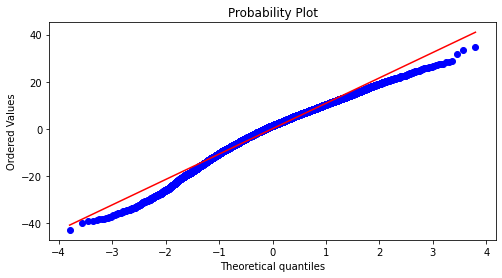

In [71]:
plt.figure(figsize=(8, 4))

probplot(results.resid, dist='norm', plot=plt)  #QQplot
plt.show()

In [72]:
X_user = data_clean_dummies['user_review']
X_ano = data_clean_dummies['ano']
X_nint = data_clean_dummies['empresa_Nintendo']
X_pc = data_clean_dummies['empresa_PC']
X_ps = data_clean_dummies['empresa_PlayStation']
X_xbox = data_clean_dummies['empresa_Xbox']

from statsmodels.formula.api import ols


#fit multiple linear regression model
model = ols('Y ~ X_user + X_ano + X_nint + X_pc + X_ps + X_xbox', data=X).fit()

#view model summary
print(model.summary())


from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     446.5
Date:                Thu, 25 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:38:26   Log-Likelihood:                -35804.
No. Observations:                9400   AIC:                         7.162e+04
Df Residuals:                    9394   BIC:                         7.166e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -369.4807     29.608    -12.479      0.0

1.9769325722533455

C:\Users\ENZOZ~1\AppData\Local\Temp/ipykernel_10756/353445754.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  plt3d = plt.figure().gca(projection="3d")


<Figure size 720x432 with 0 Axes>

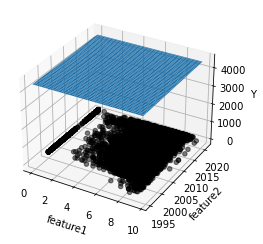

In [73]:

# Recupera os parâmetros calculados
beta0_hat = results.params[0]  # const
beta1_hat = results.params[1]  # meta
beta2_hat = results.params[2]  # 

# Define uma função que aplica aos parâmetros
def f (feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

# Gera 100 pontos entre os menores e maiores valores de cada feature
npoints = 100
feature1 = X['user_review']
feature2 = X['ano']
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

# Constrói uma grade de 100x100 pontos 
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

# Aplica a função em cada ponto da grade 
# Constrói plano estimado
fit_z = f(eixo_x, eixo_y)

# Plota os pontos e o plano em 3D
plt.figure(figsize=(10, 6))
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, Y, color="black", alpha=0.5)
plt3d.set_xlabel("feature1")
plt3d.set_ylabel("feature2")
plt3d.set_zlabel("Y")
plt.show()

In [74]:
data_clean.meta_score.min()

20

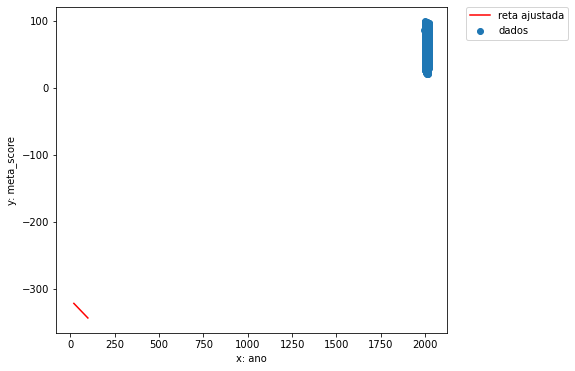

In [75]:
x_vec_2 = np.linspace(data_clean.meta_score.min(), data_clean.meta_score.max(), 2)
y_vec_2 = beta0_final + beta1_final*x_vec_2

plt.figure(figsize=(7,6))
plt.plot(x_vec_2,y_vec_2, color="r") # resultados da regressão
plt.scatter(data_clean['ano'], y_dados); # dados
plt.xlabel("x: ano")
plt.ylabel("y: meta_score")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

In [ ]:
R2 = np.square(np.subtract(Y, resultados)).mean()
RMS = math.sqrt(R2)
RMS